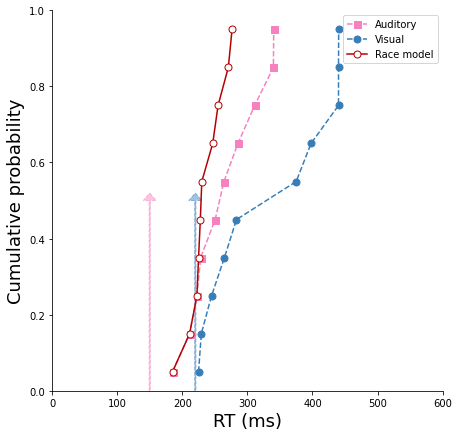

In [38]:
from src.nest.plots.generate import moving_average_plot_no_save
from src.nest.output.rates import calculate_response_times
import json
import matplotlib.pyplot as plt
import numpy as np

def cdf_calc(data):
    count, bins_count = np.histogram(data, bins=10)
    try:
        pdf = count / sum(count)
    except:
        pdf = 0
    cdf = np.cumsum(pdf)
    return bins_count, cdf


ids = [441]
th = 15
plots = [
    ['0', 'Auditory', '--s', '#f781bf', '#f781bf'],
    ['1', 'Visual', '--o', '#377eb8', '#377eb8']
]
# figure, axis = plt.subplots(2, 1, figsize=(10, 10))
# plt.setp(axis, xlim=(0, 600), ylim=(0, 1.1))
plt.figure(figsize=(7, 7))
plt.xlim(0, 600)
plt.ylim(0, 1)
plt.xlabel("RT (ms)", fontsize=18)
plt.ylabel("Cumulative probability", fontsize=18)

# 68 is AUDITORY for 100 times
# 91 is VISUAL for 100 times
# 93 is BOTH, MERGED for 100 times
# 100 is BOTH, DIFFERENT CORTEXES for 50 times

response_times = []
for index, plot in enumerate(plots):
    response_times.append([])
    response_times_complete = []
    for id in ids:
        sim = 'cortex_'+str(index+1)+'/'+str(index+1)
        with open('output/executions/'+str(id)+'/simulations/decision_making_nrp/'+sim+'/bin_rates_A_test_0.json', 'r') as j:
            bin_rates_A_complete = json.loads(j.read())
        with open('output/executions/'+str(id)+'/simulations/decision_making_nrp/'+sim+'/bin_rates_B_test_0.json', 'r') as j:
            bin_rates_B_complete = json.loads(j.read())

        ma_rates_A, times_A = moving_average_plot_no_save(bin_rates_A_complete)
        ma_rates_B, times_B = moving_average_plot_no_save(bin_rates_B_complete)

        trial_time = 3000
        bin_size = 5

        th = 15
        resp = calculate_response_times(ma_rates_A, th, trial_time, bin_size)
        for rt in resp:
            if rt == 999999999:
                response_times[index].append(rt)
            else:
                response_times[index].append(rt%1000)
                response_times_complete.append(rt%1000)

        resp = calculate_response_times(ma_rates_B, th, trial_time, bin_size)
        for rt in resp:
            if rt == 999999999:
                response_times[index].append(rt)
            else:
                response_times[index].append(rt%1000)
                response_times_complete.append(rt%1000)

        bins_count, cdf = cdf_calc(response_times_complete)

        perc = []
        for i in np.arange(0.05, 1.0, 0.1):
            perc.append(np.percentile(response_times_complete, i*100))

        # axis[0].plot(bins_count[1:], cdf, '--o', label=plot[1], color=plot[2])
        # axis[1].plot(perc, np.arange(0.05, 1.0, 0.1), '--o', label=plot[1], color=plot[2])
        plt.plot(perc, np.arange(0.05, 1.0, 0.1), plot[2], label=plot[1], color=plot[3], markerfacecolor=plot[4], markersize=7)

race_model = np.minimum.reduce([response_times[0], response_times[1]])
race_model = [v for v in race_model if v != 999999999]

# print('AUDITORY', response_times[0])
# print('VISUAL: ', response_times[1])
# print('RACE MODEL: ', race_model)

bins_count_racemodel, cdf_racemodel = cdf_calc(race_model)

perc = []
for i in np.arange(0.05, 1.0, 0.1):
    perc.append(np.percentile(race_model, i*100))
# axis[0].plot(bins_count_racemodel[1:], cdf_racemodel, '--o', label="Race model", color="crimson")
# axis[1].plot(perc, np.arange(0.05, 1.0, 0.1), '--o', label="Race model", color="crimson")
plt.plot(perc, np.arange(0.05, 1.0, 0.1), '-o', label='Race model', color="#b30000", markerfacecolor="white", markersize=7)

plt.legend()
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.arrow(150, 0, 0, 0.5, color="#f781bf77", linestyle="--", width=2, head_width=20, head_length=0.02)
plt.arrow(220, 0, 0, 0.5, color="#377eb877", linestyle="--", width=2, head_width=20, head_length=0.02)
plt.savefig('cortex_rts.png', format='png', dpi=300)
plt.show()